#Theoretical Questions


1. What is Boosting in Machine Learning?

Boosting is an ensemble learning technique that combines the predictions of several base estimators to improve accuracy. The key idea is to train models sequentially, each trying to correct the mistakes of the previous one. It gives more weight to misclassified points and reduces bias and variance.

2. How does Boosting differ from Bagging?

Aspect	Boosting	Bagging
Model Type	Sequential	Parallel
Focus	Reducing bias	Reducing variance
Sample Weight	Adaptive	Uniform
Overfitting	Less prone if regularized well	Less prone due to randomization

3. What is the key idea behind AdaBoost?

AdaBoost focuses on mistakes made by previous models. It increases the weight of misclassified examples so the next model focuses more on them. Final prediction is a weighted sum of all models.

4. Explain the working of AdaBoost with an example.

Start with uniform weights.

Train a weak learner.

Calculate error and model weight.

Update sample weights.

Repeat.

Combine all learners’ predictions.

Example: Use DecisionStump (depth=1 decision tree) as base estimator.

5. What is Gradient Boosting, and how is it different from AdaBoost?

Gradient Boosting fits the new model on the residual errors (gradients of loss function) of the previous model. Unlike AdaBoost, which updates weights explicitly, Gradient Boosting optimizes the loss function directly.

6. What is the loss function in Gradient Boosting?

Depends on the task:

Classification: Log-loss (binary cross-entropy)

Regression: Mean Squared Error (MSE), MAE, Huber loss

7. How does XGBoost improve over traditional Gradient Boosting?

Regularization (L1 & L2)

Pruning trees

Parallel computation

Missing value handling

DMatrix for optimized memory

8. What is the difference between XGBoost and CatBoost?

Feature	XGBoost	CatBoost
Categorical	Manual encoding needed	Handles natively
Training Speed	Faster with tuning	Slower but requires less tuning
Gradient	Classic GBM	Ordered boosting

9. What are some real-world applications of Boosting techniques?

Fraud detection

Loan approval prediction

Cancer diagnosis

Recommendation engines

Customer churn prediction

10. How does regularization help in XGBoost?

Regularization penalizes complex models (via L1 and L2 norms), reducing overfitting and improving generalization.

11. What are some hyperparameters to tune in Gradient Boosting models?
n_estimators

learning_rate

max_depth

subsample

min_samples_split

loss

12. What is the concept of Feature Importance in Boosting?

Feature importance shows how much a feature contributes to the prediction. It can be measured by:

Gini importance

Gain

Cover (frequency of splits)

13. Why is CatBoost efficient for categorical data?

CatBoost uses ordered boosting and target statistics to handle categorical variables without explicit encoding, avoiding overfitting and reducing data leakage.

#Practical Questions

14. Train an AdaBoost Classifier on a sample dataset and print model accuracy

In [1]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load dataset
X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train AdaBoost Classifier
model = AdaBoostClassifier(n_estimators=50, random_state=42)
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
print("AdaBoost Classifier Accuracy:", accuracy_score(y_test, y_pred))


AdaBoost Classifier Accuracy: 1.0


15. Train an AdaBoost Regressor and evaluate performance using Mean Absolute Error (MAE).

In [2]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.datasets import make_regression
from sklearn.metrics import mean_absolute_error

# Generate regression data
X, y = make_regression(n_samples=200, n_features=5, noise=0.2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train AdaBoost Regressor
reg = AdaBoostRegressor(n_estimators=50, random_state=42)
reg.fit(X_train, y_train)

# Predict and evaluate
y_pred = reg.predict(X_test)
print("Mean Absolute Error (MAE):", mean_absolute_error(y_test, y_pred))


Mean Absolute Error (MAE): 27.467840630068373


16. Train a Gradient Boosting Classifier on the Breast Cancer dataset and print feature importance.

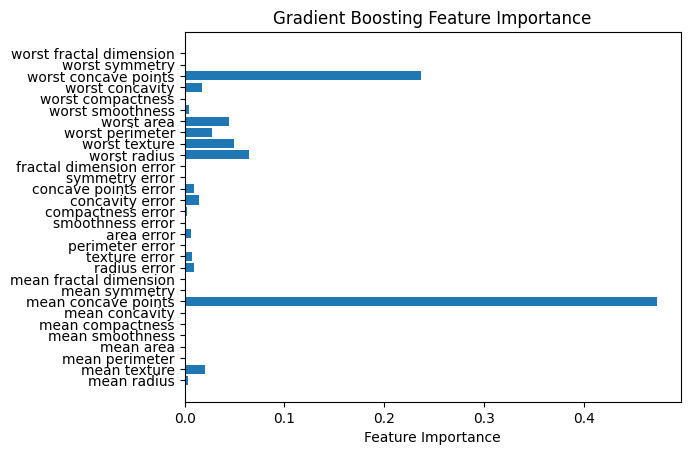

In [3]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import load_breast_cancer
import matplotlib.pyplot as plt
import numpy as np

# Load dataset
data = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, random_state=42)

# Train model
gbc = GradientBoostingClassifier(n_estimators=100)
gbc.fit(X_train, y_train)

# Feature importance
importance = gbc.feature_importances_
plt.barh(data.feature_names, importance)
plt.xlabel("Feature Importance")
plt.title("Gradient Boosting Feature Importance")
plt.show()


17. Train a Gradient Boosting Regressor and evaluate using R-Squared Score

In [4]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score

# Train and test on regression data
gbr = GradientBoostingRegressor(n_estimators=100, random_state=42)
gbr.fit(X_train, y_train)

# Predict and evaluate
y_pred = gbr.predict(X_test)
print("R-Squared Score:", r2_score(y_test, y_pred))


R-Squared Score: 0.86707107288374


18. Train an XGBoost Classifier on a dataset and compare accuracy with Gradient Boosting.

In [5]:
from xgboost import XGBClassifier

# XGBoost Classifier
xgb = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
xgb.fit(X_train, y_train)
xgb_pred = xgb.predict(X_test)

# Accuracy Comparison
xgb_acc = accuracy_score(y_test, xgb_pred)
gbc_acc = accuracy_score(y_test, gbc.predict(X_test))
print("XGBoost Accuracy:", xgb_acc)
print("Gradient Boosting Accuracy:", gbc_acc)


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:27:32] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Accuracy: 0.958041958041958
Gradient Boosting Accuracy: 0.958041958041958


19. Train a CatBoost Classifier and evaluate using F1-Score.

In [6]:
from catboost import CatBoostClassifier
from sklearn.metrics import f1_score

# Train CatBoost Classifier
cat = CatBoostClassifier(verbose=0)
cat.fit(X_train, y_train)
cat_pred = cat.predict(X_test)

# F1 Score
print("F1 Score (CatBoost):", f1_score(y_test, cat_pred))


ModuleNotFoundError: No module named 'catboost'

20. Train an XGBoost Regressor and evaluate using Mean Squared Error (MSE).

In [7]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error

# Train and evaluate
xgb_reg = XGBRegressor()
xgb_reg.fit(X_train, y_train)
xgb_pred = xgb_reg.predict(X_test)
print("MSE (XGBoost):", mean_squared_error(y_test, xgb_pred))


MSE (XGBoost): 0.04561951383948326


21. Train an AdaBoost Classifier and visualize feature importance.

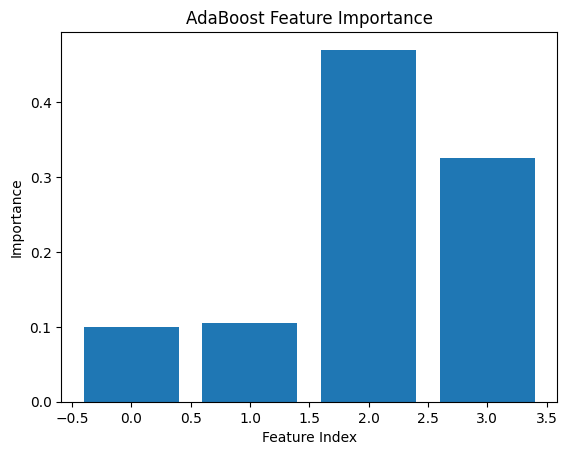

In [8]:
import matplotlib.pyplot as plt

# Feature importance
importance = model.feature_importances_
plt.bar(range(len(importance)), importance)
plt.title("AdaBoost Feature Importance")
plt.xlabel("Feature Index")
plt.ylabel("Importance")
plt.show()


22. Train a Gradient Boosting Regressor and plot learning curves.

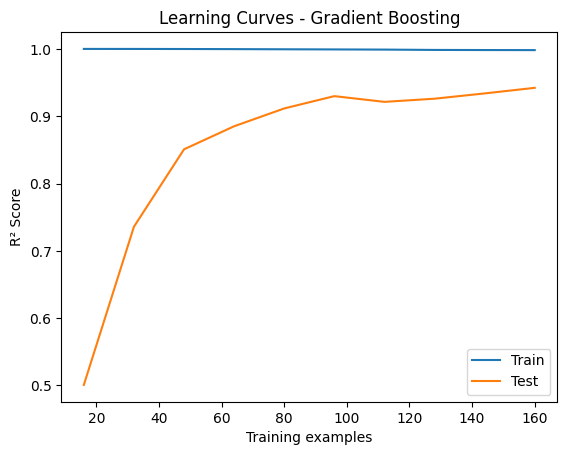

In [9]:
import numpy as np
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(
    gbr, X, y, cv=5, scoring='r2', n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10))

train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

plt.plot(train_sizes, train_scores_mean, label="Train")
plt.plot(train_sizes, test_scores_mean, label="Test")
plt.xlabel("Training examples")
plt.ylabel("R² Score")
plt.legend()
plt.title("Learning Curves - Gradient Boosting")
plt.show()


23. Train an XGBoost Classifier and visualize feature importance.

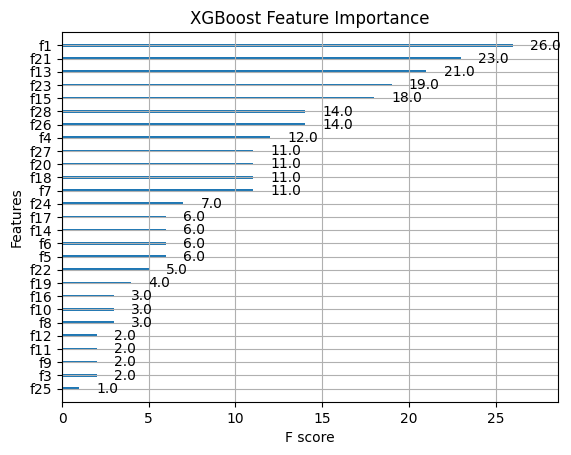

In [10]:
from xgboost import plot_importance

plot_importance(xgb)
plt.title("XGBoost Feature Importance")
plt.show()


24. Train a CatBoost Classifier and plot the confusion matrix.

In [11]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, cat_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title("CatBoost Confusion Matrix")
plt.show()


NameError: name 'cat_pred' is not defined

25. Train an AdaBoost Classifier with different numbers of estimators and compare accuracy.

In [12]:
for n in [10, 50, 100, 150]:
    model = AdaBoostClassifier(n_estimators=n, random_state=42)
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    print(f"AdaBoost Accuracy with {n} estimators: {accuracy_score(y_test, pred)}")


AdaBoost Accuracy with 10 estimators: 0.972027972027972
AdaBoost Accuracy with 50 estimators: 0.958041958041958
AdaBoost Accuracy with 100 estimators: 0.9790209790209791
AdaBoost Accuracy with 150 estimators: 0.9790209790209791


26. Train a Gradient Boosting Classifier and visualize the ROC curve.

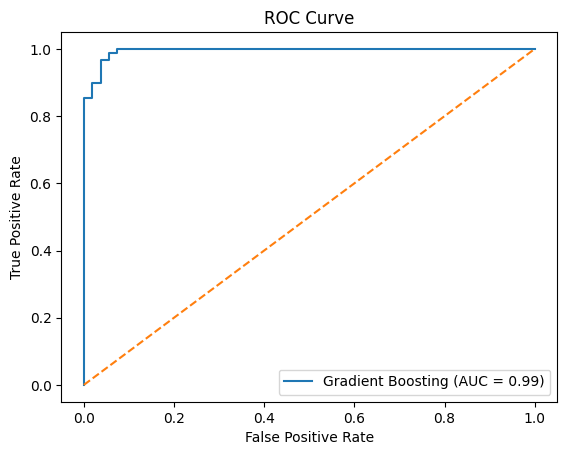

In [13]:
from sklearn.metrics import roc_curve, auc

gbc_probs = gbc.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, gbc_probs)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label='Gradient Boosting (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()


27. Train an XGBoost Regressor and tune the learning rate using GridSearchCV.

In [14]:
from sklearn.model_selection import GridSearchCV

params = {'learning_rate': [0.01, 0.1, 0.2, 0.3]}
grid = GridSearchCV(XGBRegressor(), params, scoring='neg_mean_squared_error', cv=3)
grid.fit(X_train, y_train)

print("Best Learning Rate:", grid.best_params_['learning_rate'])
print("Best MSE Score:", -grid.best_score_)


Best Learning Rate: 0.2
Best MSE Score: 0.051304460813601814


28. Train a CatBoost Classifier on an imbalanced dataset and compare performance with class weighting.

In [15]:
from sklearn.datasets import make_classification

# Create imbalanced data
X_imb, y_imb = make_classification(n_classes=2, weights=[0.9, 0.1], n_samples=1000, n_features=20, random_state=42)
X_train_imb, X_test_imb, y_train_imb, y_test_imb = train_test_split(X_imb, y_imb, random_state=42)

# CatBoost with class_weights
cat_weighted = CatBoostClassifier(class_weights=[1, 10], verbose=0)
cat_weighted.fit(X_train_imb, y_train_imb)
pred = cat_weighted.predict(X_test_imb)

print("Weighted F1 Score:", f1_score(y_test_imb, pred))


NameError: name 'CatBoostClassifier' is not defined

29.  Train an AdaBoost Classifier and analyze the effect of different learning rates.

In [ ]:
for lr in [0.01, 0.1, 0.5, 1.0]:
    ada = AdaBoostClassifier(learning_rate=lr, n_estimators=50, random_state=42)
    ada.fit(X_train, y_train)
    print(f"Learning Rate: {lr}, Accuracy: {accuracy_score(y_test, ada.predict(X_test))}")


30. Train an XGBoost Classifier for multi-class classification and evaluate using log-loss.